Classify Movie Reviews

Christopher Garcia

September 4, 2023

**Objective:** In this notebook, I will be going over a binary classification problem for movie reviews. The objective will be to classify movie reviews as being either positive or negative, based on the content given in the reviews text. 

**Dataset:**

For this example, we are going to use the IMDB dataset. This dataset contains a set of 50,000 polarized reviews from the movie database. It is split into two categories of 25,000 reviews; one for training and one for testing. Each of the two sets contain 50% of positive and 50% of negative classes. Just as the last example when we used the MNIST dataset, we can access the IMDB dataset from within the Keras package. This dataset is already processed, meaning, the sequences of words have already been transformed into integers ready for modeling. 

In [2]:
# Load dataset and import library 
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


The following argument signifies that we only keep the top 10,000 most frequently occuring woirds in the trianing data:

`num_words=10000`

The rare words will be discared which allows us to work with vector data of manageable size. As before, the variables `train_data` and `test_data` are lists of reviews. The ``train_labels` and `test_labels` are the different classes of 0's and 1's since it is a binary classification problem. 

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# No word will exceed 10000
max([max(sequence) for sequence in train_data])

9999

In [6]:
# The following decodes a review back to english
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


[Preparing Data]
Since the data is saved as lists of integers, we cannot feed it into a neural network. We would need to turn our lists into tensors. There are two ways we are able to do so:

- pad the lists so they have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in our network a layer capable of handling integer tensors.

- one-hot encode the lists to turn them into vectors of 0s and 1s. Meaning turnign a sequence of [3,5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. We would then be able to usethe first layer in our NN as a Dense layer, capable of handling floating-point vector data.


In [7]:
# We manually vectorize data using OHE
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# We can now view the samples
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

[Building a Network]

Now our data is ready to be used for our neural network. The input data is vectors, while the labels are scalers (1s and 0s). A type of network that performs well on such a problem is a simple stack of fully connected (Dense) layers with `relu` activations: (Dense(16, activation='relu).

The argument in each Dense layer (16) is the value for the number of hidden units or neurons in thje layer. A `hidden unit` is a dimension in the representation space of the layer. 

Having 16 hidden units means the weight matrix W will have shape (input_dimension, 16): the dot product with W will project the input data onto a 16-dimensional representation space (and then we'll add the bias vector b and apply the relu operation). Having more hidden units ( a higher-dimensional representaion space) allows our network to learn more complex representations, but also makes the network computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on training data but not test data).

There are two key architecture decisions to be made about such a stack of Dense layers:

- How many layers to use
- How many hidden units to choose for each layer

In the future, we will get more in depth on how to choose these layers. For now, we'll use the following convention for architecture of choice:

- two intermediate layers with 16 hidden units each
- a third layer that will output the scaler prediction regarding the sentiment of the current review

The intermediate layers will use `relu` as their activation function, and the final layer will use a sigmoid activation so as to output a probability (score between 0 and 1, indicating how likely the sample is to have the target 1). A `relu` is a function meant to zero out negative values. 

In [11]:
from keras import models
from keras import layers

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Finally, we need to choose a loss function as well as an optimizer. Since we are facing a binary classification problem and the output is a probability ( we end our network with a single-unit layer with a sigmoid activation), it is best to use the `binary_crossentropy` loss function. This is usually the best choice when dealing with models that output probability. 

[Compile model]

We are passing the optimzer, loss function, as well as the metrics in strings. 

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In order to monitor during training the accuracy of the model on the data it has never seen before, we will need to create a validation set by setting apart 10,000 samples from the original training data.

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

[Training model]

Now we can train the model for 20 epochs (20 iterations over all samples in the x_train, and y_train tensors), in mini-batches of 512 samples. At the very same time, we are also monitoring the loss and accuracy on the 10,000 samples that we set apart by passing the `validation_data` argrument.

The call to `model.fit()` returns a `History` object. The object has a member `history`, which is a dictionary that contains data about everything that occured during trianing. 

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 112ms/step - loss: 0.5148 - accuracy: 0.7847 - val_loss: 0.3844 - val_accuracy: 0.8731
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3073 - accuracy: 0.9042 - val_loss: 0.3078 - val_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2252 - accuracy: 0.9271 - val_loss: 0.3028 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1738 - accuracy: 0.9460 - val_loss: 0.2840 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1415 - accuracy: 0.9563 - val_loss: 0.3077 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1163 - accuracy: 0.9647 - val_loss: 0.2979 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0966 - accuracy: 0.9715 - val_loss: 0.3282 - val_accuracy: 0.8815
Epoch 8/20
3

In [17]:
# Check history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

the dictionary contains four entrries: one being the metric used during trianing and validation. We will now plot the training and validation loss together in order to understand how our model peformed.

[Visualize Performance]



In [18]:
import matplotlib.pyplot as plt

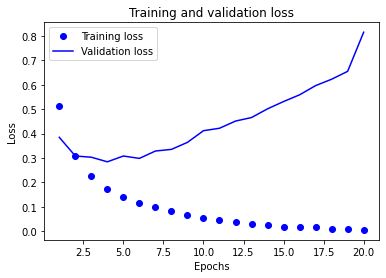

In [19]:
# Plotting the training and validation loss
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

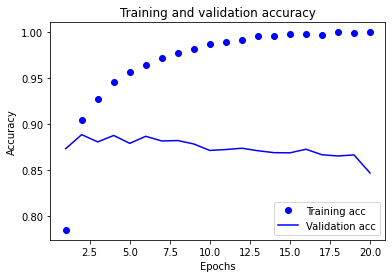

In [20]:
# Plotting training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we can see from the plots, the trianing loss decreases with every epoch, while the training accurayc increases with every epoch. This is what we expect when we run a gradient descent optimization algorithm-the quantity of what we are trying to minimize should be less at each iteration. 

However, this is not the case for the validation loss and accuracy. We cleary see `overfitting`: after the second epoch, we are overoptimizing on the training set in a way that our model ends up learning representations from the training set but does not generalize well on the testing set. To prevent overfitting, we can stop the training after a few epochs. We will train a new network uaing only four epochs, then we'll evaluate it on the test set. 

[Retrain Model-Using less Epochs]

Using a basic and naive approach yields an accuracy of 88%, however, using a more custom and intuitive approach, we are able to acheive higher accuracies (close to 95%).

In [21]:
# Retrained model
model = models.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4647 - accuracy: 0.8254
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2687 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2041 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2944 - accuracy: 0.8826


In [22]:
results

[0.2943785488605499, 0.8826000094413757]

[Generate Predictions]

Since we already built our network, it is time to use it to make predictions. We can generate the likelihood that reviews are positive using the following method: From the results, we see confident probabilities of some samples but lower confidence for others. Although this modle did provide good results, we can also do better. We can tune parameters to reduce overfitting and improve the performance of the test sets. 

In [23]:
# Predict on test set
model.predict(x_test)

array([[0.17811435],
       [0.99837744],
       [0.71305007],
       ...,
       [0.11909941],
       [0.06598821],
       [0.63368016]], dtype=float32)